In [1]:
import os
import numpy as np
import pandas as pd
import compress_json
from glob import glob
from typing import Dict
import matplotlib.pyplot as plt
from humanize import naturaldelta
from tqdm.auto import tqdm, trange
from time import perf_counter, sleep
from sanitize_ml_labels import sanitize_ml_labels

# Load the data

In [2]:
files = glob('./graphs/results/**/*.csv', recursive=True)

In [3]:
execs_type = {}
result = pd.DataFrame()
for file in files:
    # From the path extract the infos
    *_, graph, library, task = file.split("/")
    # Load the file
    df = pd.read_csv(file, header=None)
    df.columns = ["time", "memory"]
    df["graph"] = graph
    df["library"] = library
    df["task"] = task.split(".")[0]
    
    # Check if the experiment was killed
    last_row = df.iloc[-1]
    if last_row.time == -1 and last_row.memory == -1:
        exec_type = "exception"
        df = df.head(-2)
    elif np.isclose(last_row.time, 0) and np.isclose(last_row.memory, 0):
        exec_type = "ok"
        df = df.head(-1)
    else:
        exec_type = "killed"
        
    execs_type.setdefault(graph, {})
    execs_type[graph].setdefault(library, {})
    execs_type[graph][library][task.split(".")[0]] = exec_type
            
    
    display(df.tail())
    
    # Update the global results
    result = pd.concat([result, df])

result

,time,memory,graph,library,task
739,1.905075,0.222618,StringPPI,Networkx,load_graph
740,2.005526,0.233192,StringPPI,Networkx,load_graph
741,2.105991,0.242805,StringPPI,Networkx,load_graph
742,2.206464,0.253379,StringPPI,Networkx,load_graph
743,2.306923,0.262992,StringPPI,Networkx,load_graph


,time,memory,graph,library,task
868,210.281728,0.142028,StringPPI,CSRgraph,execute_second_order_second_order_walk
869,240.309732,0.142051,StringPPI,CSRgraph,execute_second_order_second_order_walk
870,270.337728,0.143058,StringPPI,CSRgraph,execute_second_order_second_order_walk
871,300.365743,0.143058,StringPPI,CSRgraph,execute_second_order_second_order_walk
872,330.396601,0.143359,StringPPI,CSRgraph,execute_second_order_second_order_walk


,time,memory,graph,library,task
771,2.910367,0.058488,StringPPI,CSRgraph,execute_first_order_first_order_walk
772,3.011097,0.058488,StringPPI,CSRgraph,execute_first_order_first_order_walk
773,3.111740,0.058488,StringPPI,CSRgraph,execute_first_order_first_order_walk
774,3.212488,0.058488,StringPPI,CSRgraph,execute_first_order_first_order_walk
775,3.313439,0.058488,StringPPI,CSRgraph,execute_first_order_first_order_walk


,time,memory,graph,library,task
681,1.001816,0.209736,StringPPI,CSRgraph,load_graph
682,1.102264,0.210217,StringPPI,CSRgraph,load_graph
683,1.202757,0.210217,StringPPI,CSRgraph,load_graph
684,1.303223,0.169926,StringPPI,CSRgraph,load_graph
685,1.403688,0.105721,StringPPI,CSRgraph,load_graph


,time,memory,graph,library,task
712,2.208306,0.056116,StringPPI,iGraph,execute_first_order_first_order_walk
713,2.308818,0.058520,StringPPI,iGraph,execute_first_order_first_order_walk
714,2.409298,0.060923,StringPPI,iGraph,execute_first_order_first_order_walk
715,2.509763,0.063326,StringPPI,iGraph,execute_first_order_first_order_walk
716,2.610283,0.018145,StringPPI,iGraph,execute_first_order_first_order_walk


,time,memory,graph,library,task
719,0.691314,0.040978,StringPPI,iGraph,load_graph
720,0.701682,0.041940,StringPPI,iGraph,load_graph
721,0.712095,0.053475,StringPPI,iGraph,load_graph
722,0.722466,0.054917,StringPPI,iGraph,load_graph
723,0.732853,0.017426,StringPPI,iGraph,load_graph


,time,memory,graph,library,task
355,3.518172,0.006842,StringPPI,EnsmallenGraph,execute_second_order_second_order_walk
356,3.618798,0.006842,StringPPI,EnsmallenGraph,execute_second_order_second_order_walk
357,3.719336,0.007803,StringPPI,EnsmallenGraph,execute_second_order_second_order_walk
358,3.819811,0.058752,StringPPI,EnsmallenGraph,execute_second_order_second_order_walk
359,3.920314,0.022704,StringPPI,EnsmallenGraph,execute_second_order_second_order_walk


,time,memory,graph,library,task
346,2.611795,0.008703,StringPPI,EnsmallenGraph,execute_first_order_first_order_walk
347,2.712300,0.008943,StringPPI,EnsmallenGraph,execute_first_order_first_order_walk
348,2.812787,0.009184,StringPPI,EnsmallenGraph,execute_first_order_first_order_walk
349,2.913470,0.036100,StringPPI,EnsmallenGraph,execute_first_order_first_order_walk
350,3.013942,0.024324,StringPPI,EnsmallenGraph,execute_first_order_first_order_walk


,time,memory,graph,library,task
705,0.712391,0.024866,StringPPI,EnsmallenGraph,load_graph
706,0.722818,0.024629,StringPPI,EnsmallenGraph,load_graph
707,0.733217,0.025110,StringPPI,EnsmallenGraph,load_graph
708,0.743604,0.025591,StringPPI,EnsmallenGraph,load_graph
709,0.754005,0.023187,StringPPI,EnsmallenGraph,load_graph


,time,memory,graph,library,task
802,2342.411898,73.105475,StringPPI,Node2Vec,execute_second_order_second_order_walk
803,2402.471738,80.888785,StringPPI,Node2Vec,execute_second_order_second_order_walk
804,2462.479780,79.257998,StringPPI,Node2Vec,execute_second_order_second_order_walk
805,2522.540236,81.408359,StringPPI,Node2Vec,execute_second_order_second_order_walk
806,2582.600753,79.736571,StringPPI,Node2Vec,execute_second_order_second_order_walk


,time,memory,graph,library,task
861,2342.372024,78.190041,StringPPI,Node2Vec,execute_first_order_first_order_walk
862,2402.432878,78.075825,StringPPI,Node2Vec,execute_first_order_first_order_walk
863,2462.493709,79.793709,StringPPI,Node2Vec,execute_first_order_first_order_walk
864,2522.554447,81.505341,StringPPI,Node2Vec,execute_first_order_first_order_walk
865,2582.615192,55.164639,StringPPI,Node2Vec,execute_first_order_first_order_walk


,time,memory,graph,library,task
930,6665.338801,189.840178,StringPPI,GraphEmbedding,execute_second_order_second_order_walk
931,6845.439229,190.595752,StringPPI,GraphEmbedding,execute_second_order_second_order_walk
932,7025.443122,24.854827,StringPPI,GraphEmbedding,execute_second_order_second_order_walk
933,7205.543571,24.234073,StringPPI,GraphEmbedding,execute_second_order_second_order_walk
934,7385.644125,29.793880,StringPPI,GraphEmbedding,execute_second_order_second_order_walk


,time,memory,graph,library,task
950,6485.256951,189.080688,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
951,6665.357371,192.064926,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
952,6845.457844,183.942901,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
953,7025.478365,21.846328,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
954,7205.578746,26.580654,StringPPI,GraphEmbedding,execute_first_order_first_order_walk


,time,memory,graph,library,task
0,0.000000,0.001533,StringPPI,Networkx,load_graph
1,0.000174,0.001533,StringPPI,Networkx,load_graph
2,0.000301,0.001533,StringPPI,Networkx,load_graph
3,0.000395,0.001533,StringPPI,Networkx,load_graph
4,0.000483,0.001533,StringPPI,Networkx,load_graph
...,...,...,...,...,...
950,6485.256951,189.080688,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
951,6665.357371,192.064926,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
952,6845.457844,183.942901,StringPPI,GraphEmbedding,execute_first_order_first_order_walk
953,7025.478365,21.846328,StringPPI,GraphEmbedding,execute_first_order_first_order_walk


In [4]:
execs_type

{'StringPPI': {'Networkx': {'load_graph': 'ok'},
  'CSRgraph': {'execute_second_order_second_order_walk': 'ok',
   'execute_first_order_first_order_walk': 'ok',
   'load_graph': 'ok'},
  'iGraph': {'execute_first_order_first_order_walk': 'ok', 'load_graph': 'ok'},
  'EnsmallenGraph': {'execute_second_order_second_order_walk': 'ok',
   'execute_first_order_first_order_walk': 'ok',
   'load_graph': 'ok'},
  'Node2Vec': {'execute_second_order_second_order_walk': 'ok',
   'execute_first_order_first_order_walk': 'ok'},
  'GraphEmbedding': {'execute_second_order_second_order_walk': 'exception',
   'execute_first_order_first_order_walk': 'exception'}}}

### Plot RAM over time for each task and each graph

In [5]:
def legend_without_duplicate_labels(fig, axes, **kwargs):
    labels_set = set()
    uniques = []
    for row in axes:
        for ax in row:
            handles, labels = ax.get_legend_handles_labels()
            axis_unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
            for (h, l) in axis_unique:
                if l not in labels_set:
                    labels_set.add(l)
                    uniques.append((h, l))
    ax.legend(*zip(*uniques), **kwargs)

In [6]:
import humanize 

def xformat_func(value, tick_number):
    if value == 0:
        return "0s"
    if value < 1e-9:
        return r"${:.0f}ps$".format(value * 1e12)
    if value < 1e-6:
        return r"${:.0f}ns$".format(value * 1e9)
    if value < 1e-3:
        return r"${:.0f}\mu s$".format(value * 1e6)
    if value < 1:
        return r"${:.0f}ms$".format(value * 1e3)
    if value < 60:
        return r"${:.0f}s$".format(value)
    if value < 3600:
        return r"${:.0f}m$".format(value / 60)
    
    return r"${:.0f}h$".format(value / 3600)

def yformat_func(value, tick_number):
    return humanize.naturalsize(value * (1000**3))

In [7]:
tasks = ["load_graph", "execute_first_order_first_order_walk", "execute_second_order_second_order_walk"]

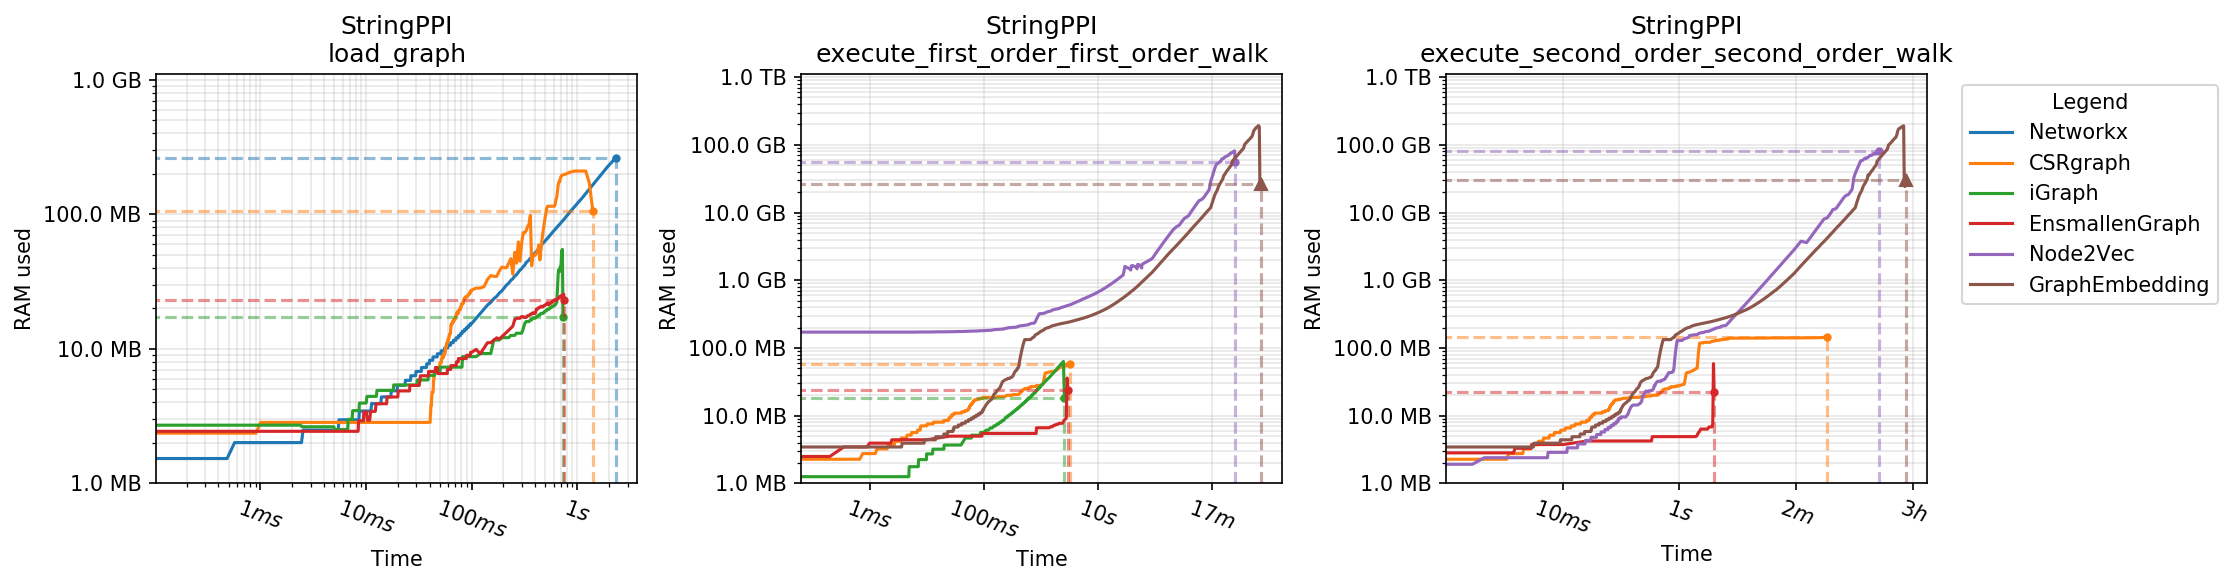

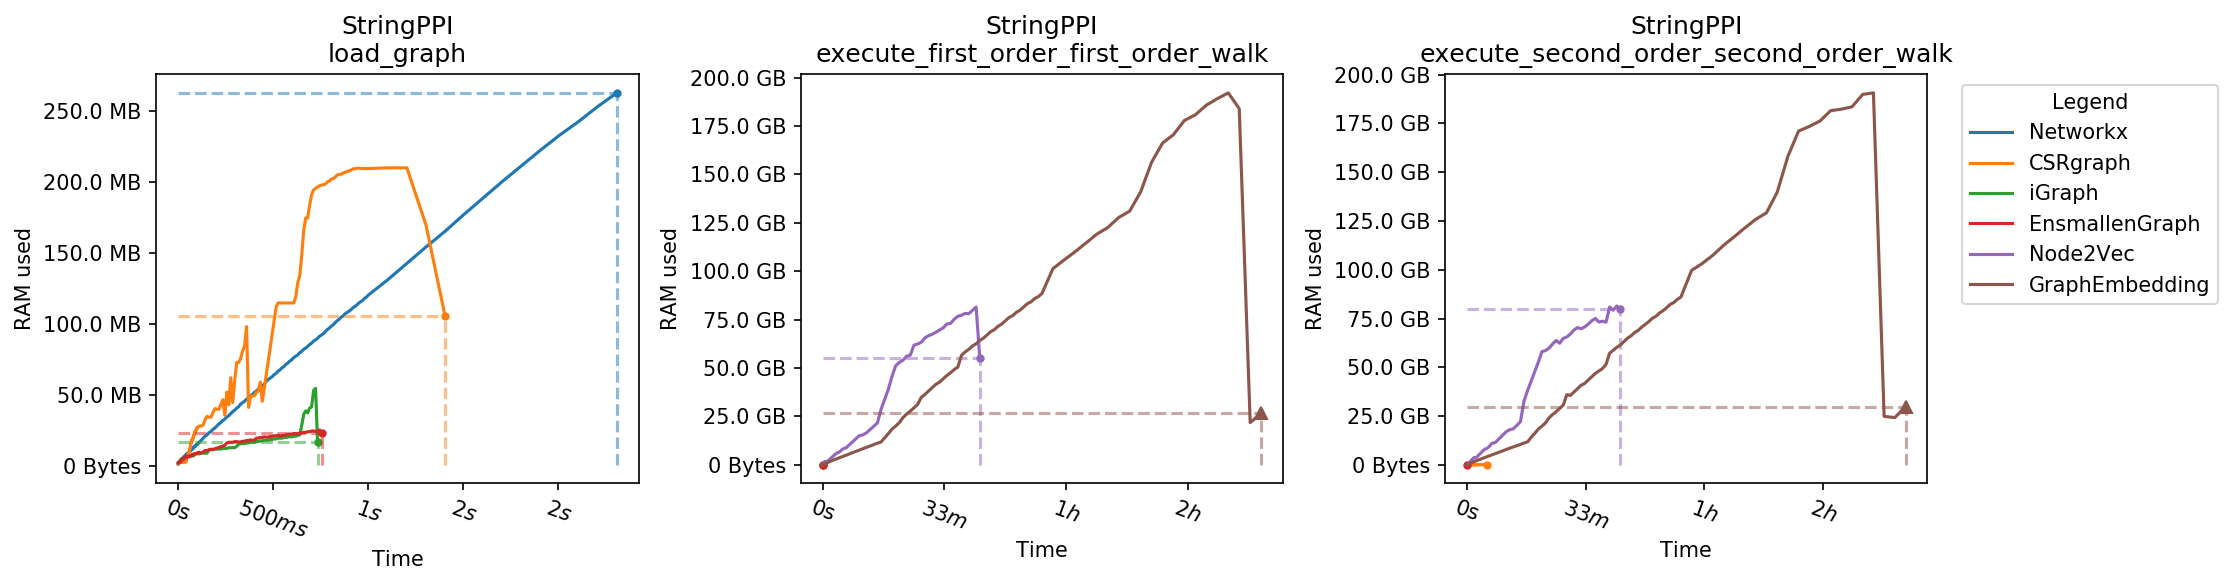

In [8]:
cmap = plt.get_cmap("tab10")
colors = dict(list(zip(result.library.unique(), cmap.colors)))
ncols=len(result.task.unique())
nrows=len(result.graph.unique())
    

for log in [True, False]:
    fig, axes = plt.subplots(
        dpi=150,
        ncols=ncols,
        nrows=nrows,
        squeeze=False,
        figsize=(5*ncols, 4*nrows)
    )
    for graph, sub_axes in zip(result.graph.unique(), axes):
        for task, axis in zip(tasks, sub_axes):
            all_data = result[(result.graph==graph) & (result.task==task)]
            max_y = 10**np.ceil(np.log10(all_data.memory.max()))
            min_y = all_data.memory.min()
            if min_y < 0.0001:
                min_y = 0.0001
            min_y = 10**np.floor(np.log10(min_y))
            max_x = all_data.time.max()
            min_x = all_data.time.min()
            for library in result.library.unique():
                # get the data for this triple (graph, task, library)
                filtered = all_data[(all_data.library==library)]
                if len(filtered):
                    # Plot the graph
                    axis.plot(filtered.time, filtered.memory, label=sanitize_ml_labels(library), c=colors[library])
                    x, y = filtered.time.iloc[-1], filtered.memory.iloc[-1]
                    # add the termination marker
                    exec_type = execs_type[graph][library][task]
                    if exec_type == "killed":
                        axis.plot([x], [y], marker="x", c=colors[library], markersize=10)
                    elif exec_type == "exception":
                        axis.plot([x], [y], marker="^", c=colors[library])
                    else:
                        axis.plot([x], [y], marker=".", c=colors[library])
                    # Draw the finish line
                    axis.plot([x, x], [min_y, y], "--", alpha=0.5, c=colors[library])
                    axis.plot([min_x, x], [y, y], "--", alpha=0.5, c=colors[library])
            if log:                    
                if not (np.isnan(min_y) or np.isnan(max_y)):
                    axis.set_ylim([min_y, max_y*1.1])
                axis.set_yscale('log')
                axis.set_xscale('log')
                axis.grid(True, which="both", ls="-", alpha=0.3)
            
            axis.set_xlabel("Time")
            axis.set_ylabel("RAM used")
            axis.xaxis.set_tick_params(rotation=-20)
            axis.xaxis.set_major_formatter(plt.FuncFormatter(xformat_func))
            axis.yaxis.set_major_formatter(plt.FuncFormatter(yformat_func))
            axis.set_title("{graph}\n{task}".format(**locals()))
            
                
    legend_without_duplicate_labels(fig, axes, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.tight_layout()
    fig.set_facecolor('w')